## Data Preparation

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [68]:
def sort_group(group):
    group = group[(group['Year'] > 1995) & ~np.isin(group["Year"], [2020, 2021, 2024])]
    group = group.sort_values(by=['Year', 'quarter'])
    return group

In [393]:
df = pd.read_csv('data/Business_Dataset.csv')
df = df.drop(columns=['Geocoded_City1','Geocoded_City2']) # we do not use coordinate data
df = df.dropna().reset_index()

agg_methods = {
    'passengers': 'sum'
}

def weighted_average(x):
    weights = df.loc[x.index, "passengers"]
    if sum(weights) == 0:
        weights = [1 for _ in range(len(weights))]
    return np.average(x, weights=weights)


for col in ['nsmiles','fare','large_ms','fare_lg','lf_ms','fare_low']:
    agg_methods[col] = weighted_average

inbounds = df.groupby(['airport_2', 'Year', 'quarter']).agg(agg_methods).reset_index().groupby(['airport_2']).apply(sort_group)
inbounds = inbounds.rename(columns={'passengers': 'inbound_passengers', "airport_2": "inbound_ap"})

outbounds = df.groupby(['airport_1', 'Year', 'quarter']).agg(agg_methods).reset_index().groupby(['airport_1']).apply(sort_group)
outbounds = outbounds.rename(columns={'passengers': 'outbound_passengers', "airport_1": "outbound_ap"})


/var/folders/5c/qd01_yk1187_jnr7n7jjw5m00000gn/T/ipykernel_10934/3876811955.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Business_Dataset.csv')
/var/folders/5c/qd01_yk1187_jnr7n7jjw5m00000gn/T/ipykernel_10934/3876811955.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  inbounds = df.groupby(['airport_2', 'Year', 'quarter']).agg(agg_methods).reset_index().groupby(['airport_2']).apply(sort_group)
/var/folders/5c/qd01_yk1187_jnr7n7jjw5m00000gn/T/ipykernel_10934/3876811955.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version o

In [400]:
inbounds[inbounds['inbound_ap'] == 'LAX'][:20]


inbound_ap  Year  quarter  inbound_passengers      nsmiles  \
airport_2                                                                   
LAX       4653        LAX  1996        1               16984  1386.606394   
          4654        LAX  1996        2               21011  1407.683261   
          4655        LAX  1996        3               21989  1425.133749   
          4656        LAX  1996        4               20650  1411.460242   
          4657        LAX  1997        1               18899  1379.225567   
          4658        LAX  1997        2               21375  1456.305965   
          4659        LAX  1997        3               22238  1460.807492   
          4660        LAX  1997        4               21838  1418.836615   
          4661        LAX  1998        1               20223  1341.394056   
          4662        LAX  1998        2               22198  1475.022615   
          4663        LAX  1998        3               22875  1494.161005   
          4664        LAX  1998        4               21729  1483.065857   
          4665        LAX  1999        1               19555  1436.566402   
          4666        LAX  1999        2               22961  1471.173904   
          4667        LAX  1999        3               24515  1483.163247   
          4668        LAX  1999        4               23218  1474.813033   
          4669        LAX  2000        1               20411  1426.538631   
          4670        LAX  2000        2               25360  1497.106349   
          4671        LAX  2000        3               25913  1506.324818   
          4672        LAX  2000        4               24941  1480.455595   

                      fare  large_ms     fare_lg     lf_ms    fare_low  \
airport_2                                                                
LAX       4653  197.872658  0.578256  204.023505  0.295785  164.509332   
          4654  189.286363  0.557500  192.952115  0.331051  160.318879   
          4655  188.881452  0.558745  195.062704  0.324213  155.098287   
          4656  185.755552  0.556258  193.161452  0.305151  153.936577   
          4657  194.273308  0.584452  197.469987  0.321938  165.538143   
          4658  206.223370  0.562095  211.982598  0.254826  169.619496   
          4659  203.993633  0.554975  210.040110  0.236296  166.332157   
          4660  201.500942  0.560872  209.324028  0.264231  161.477223   
          4661  207.805508  0.593769  212.378754  0.279961  163.218180   
          4662  211.592957  0.567179  219.097071  0.192878  171.561197   
          4663  210.088250  0.556918  217.503863  0.197161  169.124116   
          4664  212.918496  0.581075  219.227911  0.211110  178.234619   
          4665  227.500760  0.578826  236.100669  0.269341  182.079700   
          4666  220.705711  0.558571  234.376066  0.280527  182.573028   
          4667  212.495142  0.545501  224.691287  0.243962  174.358229   
          4668  208.436846  0.557797  221.263229  0.266583  168.476697   
          4669  224.940719  0.557085  238.404647  0.264616  181.321161   
          4670  223.860934  0.534679  236.029632  0.271195  188.610657   
          4671  220.361765  0.501805  236.973460  0.239445  173.245838   
          4672  216.308408  0.524322  231.099997  0.272062  172.866346   

                cluster  
airport_2                
LAX       4653        1  
          4654        1  
          4655        1  
          4656        1  
          4657        1  
          4658        1  
          4659        1  
          4660        1  
          4661        1  
          4662        1  
          4663        1  
          4664        1  
          4665        1  
          4666        1  
          4667        1  
          4668        1  
          4669        1  
          4670        1  
          4671        1  
          4672        1

In [118]:
outbounds[outbounds['outbound_ap'] == 'LAX'][:20]

outbound_ap  Year  quarter  outbound_passengers      nsmiles  \
airport_1                                                                     
LAX       6823         LAX  1996        1                29387  1397.239494   
          6824         LAX  1996        2                36324  1372.745458   
          6825         LAX  1996        3                37411  1382.229825   
          6826         LAX  1996        4                34033  1458.187024   
          6827         LAX  1997        1                32570  1419.802119   
          6828         LAX  1997        2                39414  1417.190973   
          6829         LAX  1997        3                40838  1422.479700   
          6830         LAX  1997        4                37589  1429.824443   
          6831         LAX  1998        1                33283  1388.824205   
          6832         LAX  1998        2                39768  1428.298205   
          6833         LAX  1998        3                41067  1398.068985   
          6834         LAX  1998        4                39460  1413.713558   
          6835         LAX  1999        1                37036  1383.452506   
          6836         LAX  1999        2                43509  1373.310074   
          6837         LAX  1999        3                42694  1396.979997   
          6838         LAX  1999        4                41498  1377.532604   
          6839         LAX  2000        1                38359  1309.211450   
          6840         LAX  2000        2                47743  1342.007980   
          6841         LAX  2000        3                44898  1345.113613   
          6842         LAX  2000        4                43909  1334.502494   

                      fare  large_ms     fare_lg     lf_ms    fare_low  
airport_1                                                               
LAX       6823  186.772626  0.526753  197.644119  0.295876  148.341135  
          6824  180.140208  0.513289  188.694693  0.267790  143.424001  
          6825  174.477024  0.513269  180.346905  0.238879  137.690872  
          6826  183.679263  0.520141  192.726554  0.290668  147.655808  
          6827  188.196801  0.522298  194.139324  0.287681  154.099493  
          6828  184.522466  0.530448  190.150717  0.316088  155.140414  
          6829  176.764743  0.522381  185.743918  0.285937  136.410534  
          6830  189.293895  0.530108  200.803092  0.308616  147.846572  
          6831  203.440753  0.532586  214.493102  0.277604  150.063242  
          6832  195.787049  0.526569  211.902203  0.234660  143.934170  
          6833  183.524189  0.545039  192.596869  0.351615  148.208829  
          6834  185.956242  0.544835  194.323092  0.298415  149.450525  
          6835  195.472389  0.546661  202.029500  0.288168  152.722860  
          6836  187.699156  0.535807  198.415893  0.248185  147.779607  
          6837  188.004323  0.514932  206.565286  0.286368  145.429216  
          6838  190.871850  0.525027  205.868311  0.290779  151.447844  
          6839  200.589668  0.530240  211.502578  0.271963  167.539075  
          6840  196.210788  0.515292  209.578434  0.313775  165.356317  
          6841  197.576888  0.500545  218.607769  0.356148  167.454200  
          6842  196.087045  0.514807  209.018984  0.325517  165.881008

In [158]:
print(len(inbounds))
print(len(outbounds))
inbounds.to_csv('out.csv')

10497
11758


In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

test_df = None
def kmeans_airports(ap='inbound'):
    if ap == 'inbound':
        X = inbounds
    elif ap == 'outbound':
        X = outbounds
    else:
        raise Exception("not a valid type")
    
    X = X.groupby([f'{ap}_ap']).agg({f'{ap}_passengers': 'mean', 'nsmiles':'mean'})
    airports = X.index
    X = X[[f'{ap}_passengers', 'nsmiles']]

    kmeans = KMeans(n_clusters=3)
    clusters = kmeans.fit_predict(X)
    X['cluster'] = clusters
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 7))

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], cmap='viridis', s=20)

    plt.title(f'K-means Clustering of Airports ({ap.capitalize()})')
    plt.xlabel(f'{ap.capitalize()} Passengers')
    plt.ylabel('Number of Miles Traveled')

    for i, airport in enumerate(X.index):
        plt.annotate(airport, (X_pca[i, 0], X_pca[i, 1]), fontsize=6, alpha=0.75)
        
    cluster_dict = dict(zip(airports, X['cluster']))
    if ap == 'inbound':
        inbounds['cluster'] = inbounds['inbound_ap'].map(cluster_dict)
    else:
        outbounds['cluster'] = outbounds['outbound_ap'].map(cluster_dict)

    plt.colorbar(label='Cluster')
    plt.show()


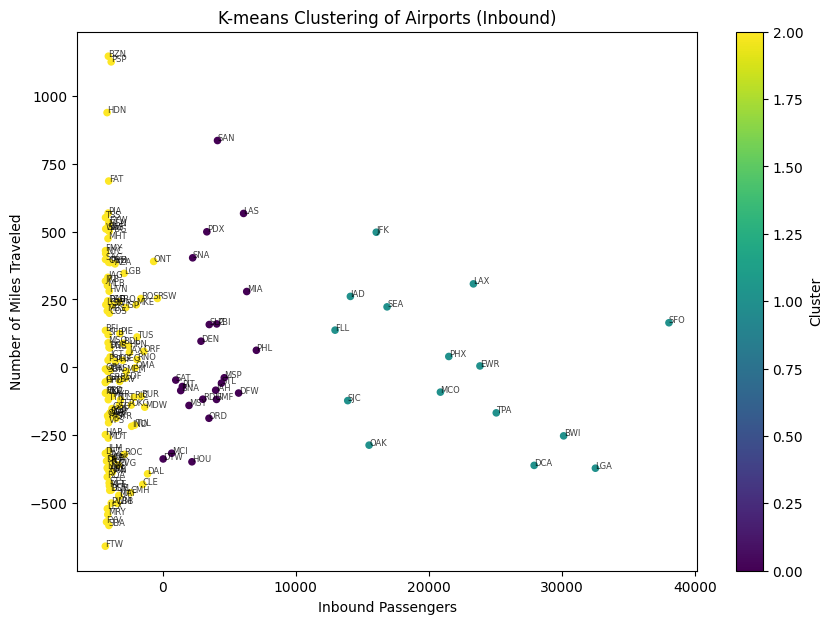

In [395]:
kmeans_airports('inbound')

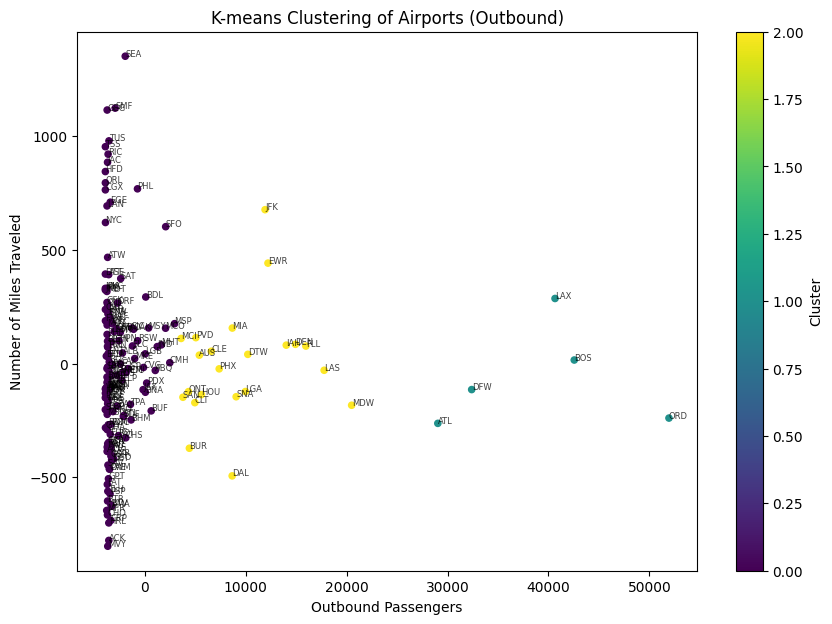

In [396]:
kmeans_airports('outbound')

In [409]:
# current cluster 1
X = inbounds[inbounds['cluster'] == 1].reset_index().drop(columns='airport_2')
X_train_in,  y_train_in, X_test_in, y_test_in = X[X['Year'] < 2017], X[X['Year'] < 2017]['inbound_passengers'], \
    X[X['Year'] >= 2017], X[X['Year'] >= 2017]['inbound_passengers'],

X = outbounds[outbounds['cluster'] == 1].reset_index().drop(columns='airport_1')
X_train_out,  y_train_out, X_test_out, y_test_out = outbounds[outbounds['Year'] < 2017].drop(columns=['outbound_passengers', 'outbound_ap']), outbounds[outbounds['Year'] < 2017]['outbound_passengers'], \
    outbounds[outbounds['Year'] >= 2017].drop(columns=['outbound_passengers', 'outbound_ap']), outbounds[outbounds['Year'] >= 2017]['outbound_passengers'],

## Linear Regression

In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [411]:
X_train_in

,level_1,inbound_ap,Year,quarter,inbound_passengers,nsmiles,fare,large_ms,fare_lg,lf_ms,fare_low,cluster
0,651,BWI,1996,1,16490,1023.730443,164.597435,0.618421,165.443428,0.304402,136.204538,1
1,652,BWI,1996,2,22301,1032.838393,156.455136,0.585762,155.495217,0.285758,131.976263,1
2,653,BWI,1996,3,23135,1078.785822,151.754221,0.570818,151.237316,0.356909,125.443089,1
3,654,BWI,1996,4,23551,1069.253577,148.037183,0.578860,150.097364,0.334313,119.735641,1
4,655,BWI,1997,1,21038,1071.278116,150.392900,0.585197,152.443071,0.373114,126.621161,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,11509,TPA,2015,4,31369,1062.631898,192.065936,0.649040,198.421270,0.334057,161.201357,1
1536,11510,TPA,2016,1,33300,1070.428709,190.659511,0.653161,198.282871,0.410940,162.739408,1
1537,11511,TPA,2016,2,32453,1068.291991,189.684654,0.665886,193.332850,0.438920,162.320420,1
1538,11512,TPA,2016,3,26720,1069.961751,192.836874,0.663075,197.271594,0.467706,159.226041,1


In [412]:
y_train_in

0       16490
1       22301
2       23135
3       23551
4       21038
        ...  
1535    31369
1536    33300
1537    32453
1538    26720
1539    30625
Name: inbound_passengers, Length: 1260, dtype: int64

LinearRegression()

In [414]:
y_pred_in = model_in.predict(X_test_in.drop(columns=['inbound_passengers', 'inbound_ap']))

In [415]:
mape = mean_absolute_percentage_error(y_test_in, y_pred_in)
mape.item()

0.2420044472433792

In [416]:
X_test_in['date'] = X_test_in["Year"].astype(str).str.slice(2) + "q" + X_test_in["quarter"].astype(str)
X_test_in = X_test_in.reset_index()
X_test_in

,index,level_1,inbound_ap,Year,quarter,inbound_passengers,nsmiles,fare,large_ms,fare_lg,lf_ms,fare_low,cluster,date
0,84,735,BWI,2017,1,30685,1078.843213,189.488212,0.722195,192.512289,0.410573,158.125373,1,17q1
1,85,736,BWI,2017,2,40328,1089.766564,198.189295,0.714543,201.916088,0.441807,160.702802,1,17q2
2,86,737,BWI,2017,3,37798,1103.001825,187.124808,0.702174,191.627173,0.422729,153.252060,1,17q3
3,87,738,BWI,2017,4,37402,1053.250709,185.490234,0.720420,189.741912,0.451822,151.679211,1,17q4
4,88,739,BWI,2018,1,31605,1087.948394,188.977780,0.718933,194.062576,0.369139,147.678271,1,18q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1555,11537,TPA,2022,4,36630,1096.725990,226.497839,0.583274,237.360465,0.355613,166.980443,1,22q4
296,1556,11538,TPA,2023,1,40443,1096.650743,214.035212,0.589218,221.059454,0.351693,150.361102,1,23q1
297,1557,11539,TPA,2023,2,40906,1093.977143,210.565469,0.603936,220.656379,0.343720,144.260697,1,23q2
298,1558,11540,TPA,2023,3,32699,1106.133399,200.364638,0.598483,213.619730,0.363901,146.244585,1,23q3


In [417]:
y_test_in = y_test_in.reset_index()

In [428]:
X_train_in['date'] = X_train_in["Year"].astype(str).str.slice(2) + "q" + X_train_in["quarter"].astype(str)
X_train_in = X_train_in.reset_index()
y_train_in = y_train_in.reset_index()

/var/folders/5c/qd01_yk1187_jnr7n7jjw5m00000gn/T/ipykernel_10934/4289571500.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  airport_data = X.groupby(['inbound_ap']).get_group(airport)
/var/folders/5c/qd01_yk1187_jnr7n7jjw5m00000gn/T/ipykernel_10934/4289571500.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  airport_data = X.groupby(['inbound_ap']).get_group(airport)
/var/folders/5c/qd01_yk1187_jnr7n7jjw5m00000gn/T/ipykernel_10934/4289571500.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  airport_data = X.groupby(['inbound_ap

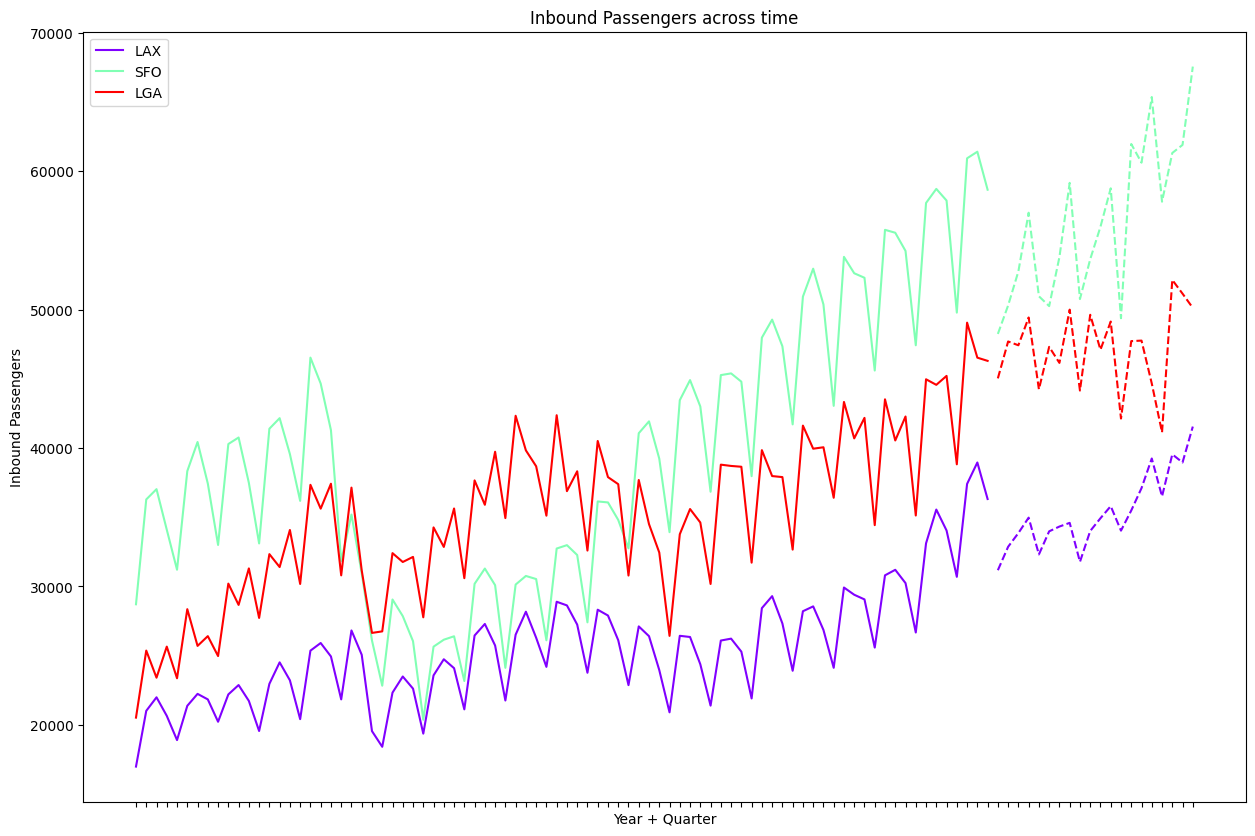

In [494]:
def linreg(airport, color):
    X = inbounds.reset_index()
    airport_data = X.groupby(['inbound_ap']).get_group(airport)

    X_train, y_train, X_test, y_test = airport_data[airport_data['Year'] < 2017], airport_data[airport_data['Year'] < 2017]['inbound_passengers'], \
        airport_data[airport_data['Year'] >= 2017], airport_data[airport_data['Year'] >= 2017]['inbound_passengers']

    X_train, y_train, X_test, y_test = X_train.reset_index(), y_train.reset_index(), X_test.reset_index(), y_test.reset_index()
    
    model = LinearRegression()
    model.fit(X_train.drop(columns=['inbound_passengers', 'inbound_ap', 'airport_2']), y_train)

    y_pred = model.predict(X_test.drop(columns=['inbound_passengers', 'inbound_ap', 'airport_2']))
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape.item()

    X_train['date'] = X_train["Year"].astype(str).str.slice(2) + "q" + X_train["quarter"].astype(str)
    X_test['date'] = X_test["Year"].astype(str).str.slice(2) + "q" + X_test["quarter"].astype(str)
    
    airport_indices = list([X_test[X_test['inbound_ap'] == a].index for a in [airport]][0])
    airport_indices_train = list([X_train[X_train['inbound_ap'] == a].index for a in [airport]][0])
    
    # plt.plot(pd.concat([X_train.iloc[airport_indices_train]['date'], X_test.iloc[airport_indices]['date']]), 
    #          pd.concat([y_train.iloc[airport_indices_train]['inbound_passengers'], y_test.iloc[airport_indices]['inbound_passengers']]), 
    #          color=color, label=airport)
    plt.plot(pd.concat([X_train.iloc[airport_indices_train]['date']]), 
             pd.concat([y_train.iloc[airport_indices_train]['inbound_passengers']]), 
             color=color, label=airport)
    plt.plot(X_test.iloc[airport_indices]['date'], y_pred[airport_indices][:, 1], color=color, linestyle='dashed')

    plt.xlabel('Year + Quarter')
    plt.ylabel('Inbound Passengers')
    plt.title('Inbound Passengers across time')

    plt.tick_params(left=True, right=False, labelleft=True, labelbottom=False, bottom=True) 
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    
    return mape

airports = ['LAX', 'SFO', 'LGA']
cmap = plt.get_cmap('rainbow')
mapes = []
colors = cmap(np.linspace(0, 1, len(airports)))
for a, c in zip(airports, colors):
    mapes.append(linreg(a, c))

plt.legend()
plt.show()


In [466]:
print(np.mean(mapes))

0.08546341145891437
